# Predicting Diabetes by ANN in PyTorch
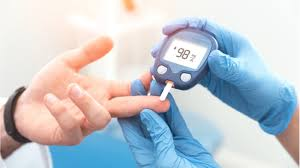

**In this notebook we'll attempt to create a artifical neural network(basic) with Pytorch,and use it to predict the diabetes**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data= pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

In [ ]:
data.head()

In [ ]:
data.isnull().sum()

Since there are no null values let's understand the data through visualization

# Data Visualisation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.countplot(data['Outcome'])

In [ ]:
def boxplot(df: pd.DataFrame) -> None:
    """
    Visualize a boxplot for each feature for each class.
    """
    fig, axis = plt.subplots()

    for col in df.columns:
        if col != 'Outcome':
            sns.boxplot(x='Outcome', y=col, data=df, palette='Blues')
            plt.show()
            
# call the function to display the boxplot
boxplot(df=data)

Checking the relation between Insulin and Glucose since both are directly related

In [ ]:
sns.scatterplot(x='Insulin', y='Glucose', hue='Outcome', data=data)
plt.xlabel('Insulin')
plt.ylabel('Glucose')

In [ ]:
#plotting age feature
sns.FacetGrid(data, hue="Outcome", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend()
plt.show()

In [ ]:
sns.pairplot(data,hue='Outcome')

In [ ]:
data.corr()

In [ ]:
plt.subplots(figsize=(15,8))

sns.heatmap(data.corr(),annot=True,cmap='rainbow')

**Preparing data...**

In [ ]:
y= data['Outcome']

In [ ]:
data.drop(['Outcome'],axis=1,inplace=True)

In [ ]:
x= data

In [ ]:
x.head()

Scaling Data for better results

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled= scaler.fit_transform(x)

Splitting Data



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_val,y_train,y_val= train_test_split(scaled,y)

#  Let' begin Pytorch:-
**PyTorch is a library for Python programs that facilitates building deep learning projects PyTorch supports dynamic computational graphs, which means the network behavior can be changed programmatically at runtime. This facilitates more efficient model optimization and gives PyTorch a major advantage over other machine learning frameworks, which treat neural networks as static objects. If you want to explore Deep learning then Pytorch is your friend
Kindly head to https://pytorch.org/docs/master/nn.html to unvail the beauty of Pytorch library **
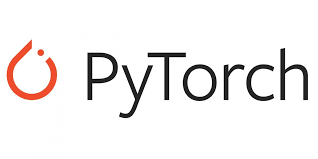

other resources https://www.analyticsvidhya.com/blog/2018/02/pytorch-tutorial/

https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/


In [ ]:
#importing torch 
import torch
import torch.nn as nn
import torch.nn.functional as F

Before working with Pytorch we have to convert our array to tensor

In [ ]:
X_train= torch.FloatTensor(X_train)
X_val= torch.FloatTensor(X_val)


In [ ]:
y_train= torch.LongTensor(y_train.values)
y_val= torch.LongTensor(y_val.values)

# Aartificial Nueral Network
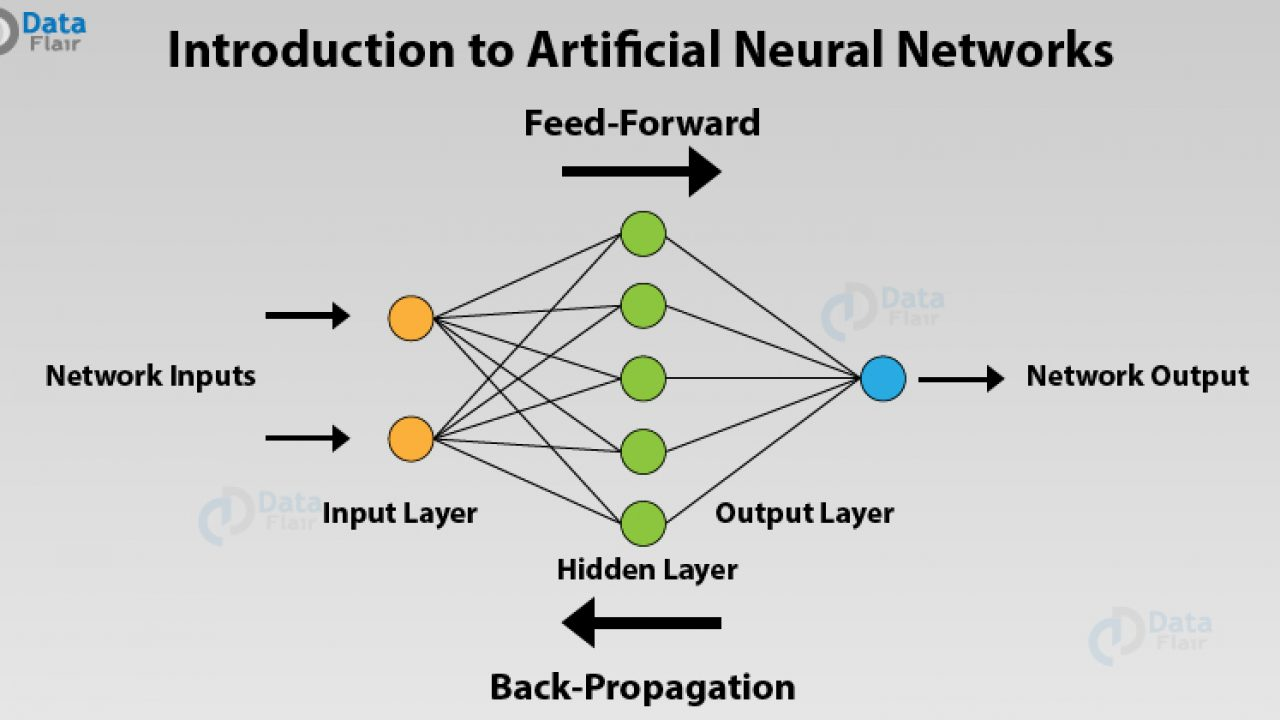

Artificial neural network is an attempt to mimic neurons in human brain,
Neural networks consist of input and output layers, as well as (in most cases) a hidden layer consisting of units that transform the input into something that the output layer can use. They are excellent tools for finding patterns which are far too complex or numerous for a human programmer to extract and teach the machine to recognize.


**Let us attempt to build a ANN on our own using PyTorch**
Let's divide our task in following steps-
1. Define a class name ANN_Model, which is a subclass of nn.Module class which is Base class for all neural network modules.
2. the second step is defining the init function which will take input features, number of neurons in a hidden layer and output features(2 in the case of binary classification)
3. Inside the init function we'll define 2 fully connected Linear network with help of nn in PyTorch
4. Next we'll define forward function 
5. Inside the forward function we'll activate our fully connected layer, by relu activation function
6. And also perform forward propogation

In [ ]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=25,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,h):
        h=F.relu(self.f_connected1(h))
        h=F.relu(self.f_connected2(h))
        h=self.out(h)
        return h

We'll seed to prevent randomness

In [ ]:
torch.manual_seed(20)
model=ANN_Model()

Checking model parameters

In [ ]:
model.parameters

Define loss as Cross Entropy loss

In [ ]:
loss_function= nn.CrossEntropyLoss()

we'll optimize our model with Adam optimizer

In [ ]:
optimizer= torch.optim.Adam(model.parameters(),lr=0.01)

Let us run our model...

Here for each epoch we are calculating loss and appending it in final losses, then we'll optimize our loss and perform back propagation on it Pytorch provides .backward function for the same

In [ ]:
epochs=100
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Plotting loss 

In [ ]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

**Creating Predictions**

for this you simply have to pass your validation data to model and simply append all the predictions


In [ ]:
#predictions in data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_val):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())

In [ ]:
predictions

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score= accuracy_score(y_val,predictions)

In [ ]:
print("The accuracy of your model is {} percent".format(accuracy_score*100))

The accuracy of our model is 74.5% which is pretty good also it can be improved by changing the number of hidden layers and 
neurons

check out https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e for more

video reference https://www.youtube.com/watch?v=Bc2dWI3vnE0